In [1]:
import torch
from diffusers import StableDiffusionPipeline
import os
import sys

pipe = StableDiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-2-1-base", torch_dtype=torch.float16)  

pipe = pipe.to("cuda")

from PIL import Image

def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))

    return grid

def generateImagesWithSeed(prompt, rows, cols, seed=None, **kwargs):
  img_count = rows * cols

  generator = torch.Generator("cuda")
  if seed is None:
    generator.seed()
    seed = generator.initial_seed()
  else:
      generator.manual_seed(seed)

  images = pipe([prompt] * img_count, generator=generator, **kwargs).images

  print(seed)

  return image_grid(images, rows, cols)

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

c:\Users\kevsu\anaconda3\envs\cuda-pytorch\lib\site-packages\transformers\models\clip\feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


  0%|          | 0/50 [00:00<?, ?it/s]

1671328204030125


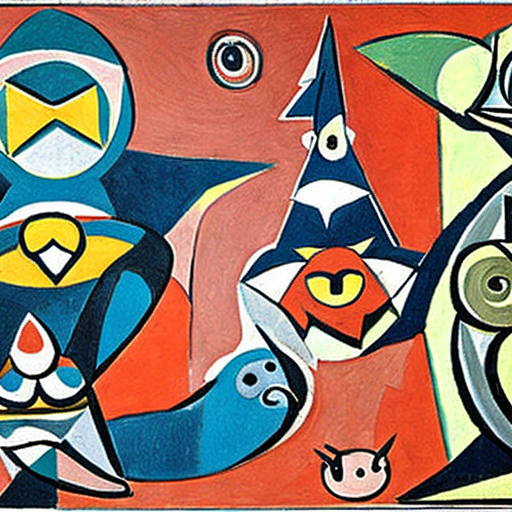

In [2]:
generateImagesWithSeed("pokemon by pablo picasso", 1, 1, height=512, width=512)